# Calculating calibration densities and plotting models
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [4]:
# Import useful python packages
import pandas as pd
import os
import DiadFit as pf
pf.__version__

'1.0.10'

## Plot of density vs fermi splitting

In [5]:
cornellpath=os.getcwd()+'/'+"CMASS_cali_data.xlsx"
cornellcell=pd.read_excel(cornellpath,sheet_name="April_Used2FitEG_Eqs") # This is the data originally used to fit the equations for CMASS (only april 2021)
apraugdat=pd.read_excel(cornellpath,sheet_name="APR 2021 +AUG21") # This cali dataset includes both april and august 2021.
display(cornellcell.head())

c:\Users\penny\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Date,time,Raw file name,Sample,v- position (cm-1),v+ position (cm-1),corr v-,corr v+,∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),...,∆Ne-m (cm-1),∆Ne-r (cm-1),1116 r (cm-1),1446.5 r (cm-1),m,b,laser power,int x acc,approx max counts,Unnamed: 28
0,2021-04-20,14:56:32,FDCA01X1,FDCA01,1279.658597,1384.534514,1280.266389,1385.209445,104.875917,104.943056,...,330.266206,330.477635,1115.991927,1446.469562,1.000640,-0.211417,54 mW,10s x 3,50000,NaN
1,2021-04-20,15:00:18,FDCA01X2,FDCA01,1279.662216,1384.533940,1280.273228,1385.208244,104.871724,104.935016,...,330.278306,330.477635,1115.991927,1446.469562,1.000604,-0.161288,54 mW,10s x 3,50000,NaN
2,2021-04-20,15:04:15,FDCA01X3,FDCA01,1279.656182,1384.534258,1280.271344,1385.214356,104.878076,104.943013,...,330.273142,330.477635,1115.991927,1446.469562,1.000619,-0.177154,54 mW,10s x 3,50000,NaN
3,2021-04-20,15:15:56,FDCA02X1,FDCA02,1279.748089,1384.568105,1280.364694,1385.246217,104.820016,104.881523,...,330.283828,330.477635,1115.991927,1446.469562,1.000587,-0.134338,54 mW,10s x 3,50000,NaN
4,2021-04-20,15:22:06,FDCA02X2,FDCA02,1279.748730,1384.569705,1280.361785,1385.246675,104.820975,104.884890,...,330.276249,330.477635,1115.991927,1446.469562,1.000610,-0.167272,54 mW,10s x 3,50000,NaN


# Fit the calibration lines 
- Separate sets by temperature

In [6]:
T37C=cornellcell[cornellcell['T (ID)']==37]
T37C_withaug=apraugdat[apraugdat['T (ID)']==37]

Split_col='Ne corrected ∆CO2  (cm-1)'
CO2_dens_col='Density from EOS  (g/ml)'
split_error=0.01
CO2_dens_error=0.01


In [7]:
T37C.to_excel(r'Cornell_CMASS_37C.xlsx')

## This creates the pickles for the calibration lines as they were until 10/17/2023
- These cali lines only include cali data from april 2021

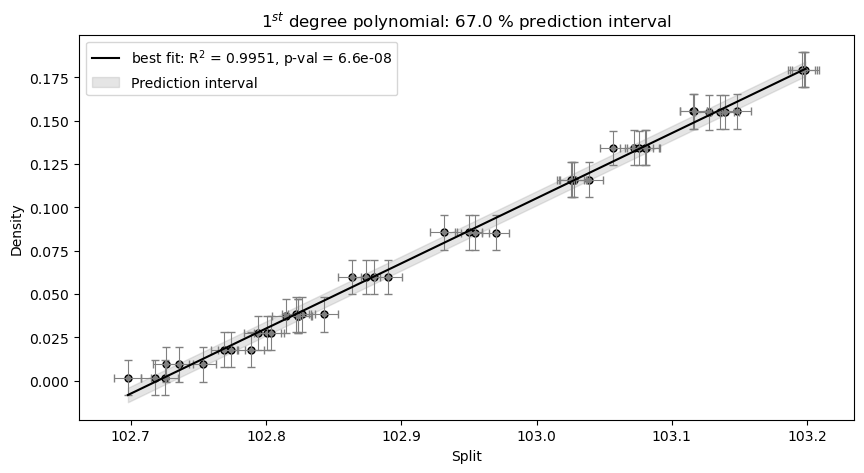

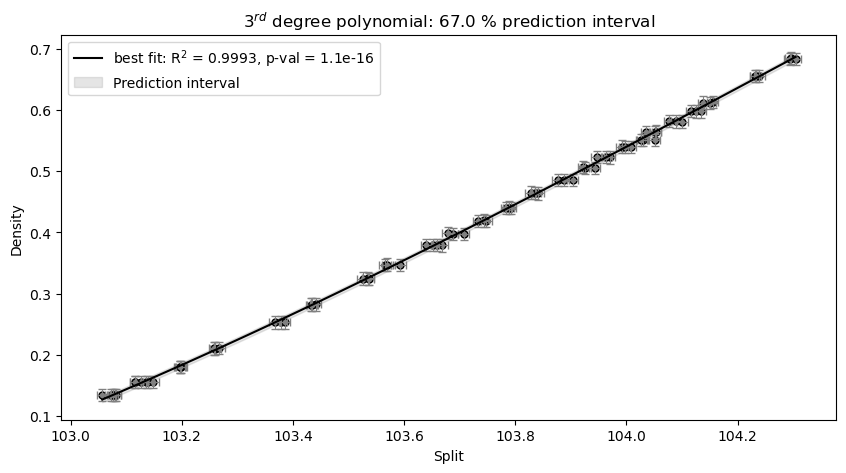

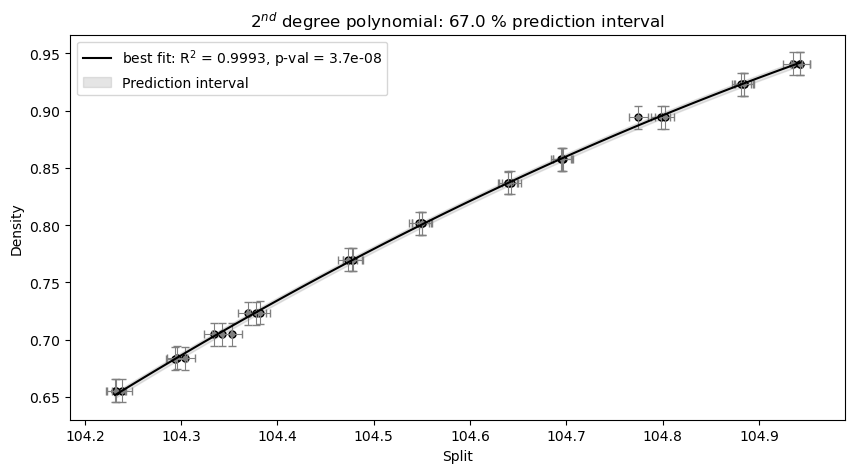

In [8]:
CI=0.67
df=T37C
eq_division='cmass'
save_suffix='_CMASS'

pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


## This creates pickles using cali data from both april and august 2021 
- NOTE that this was not included previously to 10/17/2023, meaning the equations used prior to this date were considering only april data

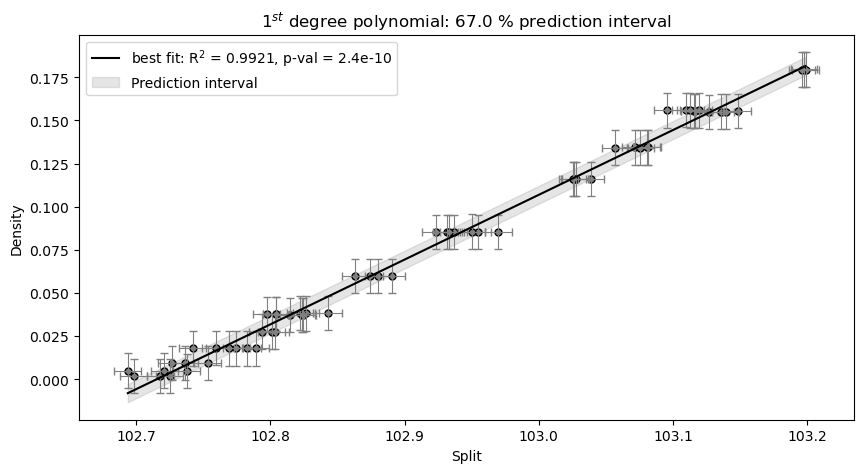

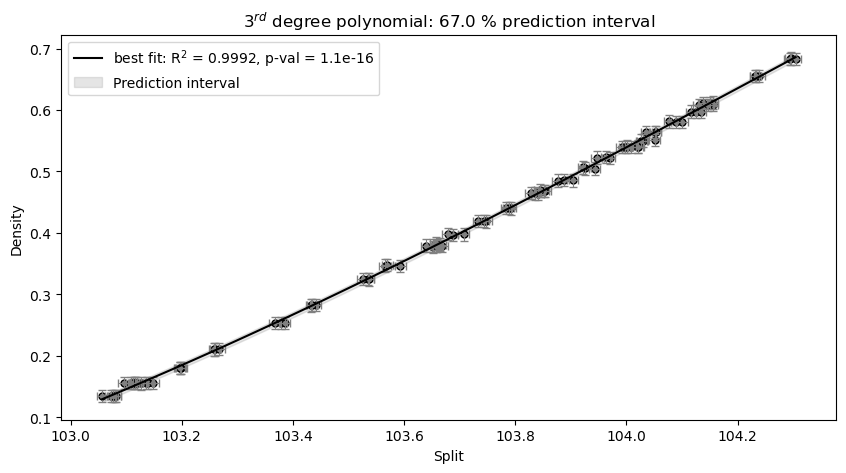

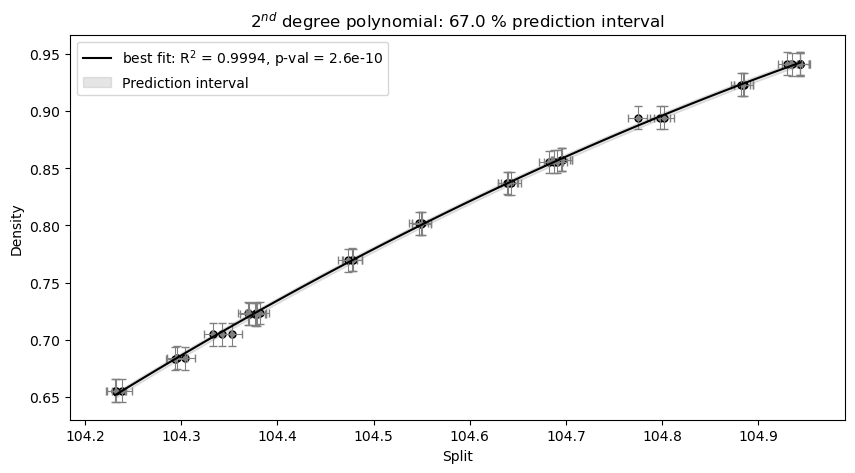

In [9]:
CI=0.67
df=T37C_withaug
eq_division='cmass'
save_suffix='_CMASS_waug'
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


## Now lets try making a single calibration that returns a single model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [63]:
class CombinedCO2Model:
    def __init__(self, models, eq_division='ccmr'):
        self.models = models
        if eq_division == 'ccmr':
            self.lowcut = 0.17
            self.midcut_low = 0.12
            self.midcut_high = 0.72
            self.highcut = 0.65
        elif eq_division == 'cmass':
            self.lowcut = 0.20
            self.midcut_low = 0.13
            self.midcut_high = 0.70
            self.highcut = 0.65
        elif eq_division == 'cmass_24C':
            self.lowcut = 0.24
            self.midcut_low = 0.24
            self.midcut_high = 0.65
            self.highcut = 0.65
        else:
            raise ValueError("Unknown eq_division")

    def __call__(self, x):
        # Support scalars, lists, np.array, and pd.Series
        is_series = isinstance(x, pd.Series)
        x_array = x.to_numpy() if is_series else np.asarray(x)
        result = np.full_like(x_array, np.nan, dtype=float)

        # These are correct for RHO, not SPLIT. Let's clarify.
        # So instead, we apply based on SPLITTING ranges:
        # We'll infer split thresholds from actual data range.

        # For testing — print thresholds:
        print("Cutoffs: lowcut =", self.lowcut, "mid =", (self.midcut_low, self.midcut_high), "highcut =", self.highcut)

        # Apply polynomials by region
        mask_low = x_array < self.lowcut
        mask_mid = (x_array >= self.midcut_low) & (x_array <= self.midcut_high)
        mask_high = x_array > self.highcut

        if np.any(mask_low):
            print("Applying LOW model to", np.sum(mask_low), "values")
            result[mask_low] = self.models['Low'](x_array[mask_low])
        if np.any(mask_mid):
            print("Applying MEDIUM model to", np.sum(mask_mid), "values")
            result[mask_mid] = self.models['Medium'](x_array[mask_mid])
        if np.any(mask_high):
            print("Applying HIGH model to", np.sum(mask_high), "values")
            result[mask_high] = self.models['High'](x_array[mask_high])

        return pd.Series(result, index=x.index) if is_series else result


In [64]:

def plot_and_save_CO2cali_pickle_all(*, cali_data, CO2_dens_col='rho', Split_col='Split',
                                     split_error='split_err', CO2_dens_error='dens_err',
                                     N_poly=None, CI=0.67, std_error=True, save_fig=False,
                                     eq_division='ccmr', save_suffix=''):
    """
    Fits and saves a CombinedCO2Model object using Low/Medium/High regions.
    Supports region-specific polynomial degrees via N_poly dictionary.
    """

    if eq_division == 'ccmr':
        lowcut = 0.17
        midcut_low = 0.12
        midcut_high = 0.72
        highcut = 0.65
    elif eq_division == 'cmass':
        lowcut = 0.20
        midcut_low = 0.13
        midcut_high = 0.70
        highcut = 0.65
    elif eq_division == 'cmass_24C':
        lowcut = 0.24
        midcut_low = 0.24
        midcut_high = 0.65
        highcut = 0.65
    else:
        raise ValueError("Invalid eq_division")

    regions = {
        'Low': cali_data[cali_data[CO2_dens_col] < lowcut],
        'Medium': cali_data[cali_data[CO2_dens_col].between(midcut_low, midcut_high)],
        'High': cali_data[cali_data[CO2_dens_col] > highcut]
    }

    # Handle N_poly as either a single int or a dict
    if isinstance(N_poly, int):
        N_poly_dict = {'Low': N_poly, 'Medium': N_poly, 'High': N_poly}
    elif isinstance(N_poly, dict):
        N_poly_dict = N_poly
    else:
        raise ValueError("N_poly must be an int or a dict with keys: 'Low', 'Medium', 'High'")

    models = {}
    fig, ax = plt.subplots(figsize=(10, 5))

    for region, sub_df in regions.items():
        x = sub_df[Split_col].values
        y = sub_df[CO2_dens_col].values
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]

        degree = N_poly_dict[region]
        poly = np.poly1d(np.polyfit(x, y, degree))
        models[region] = poly

        xfit = np.linspace(np.min(x), np.max(x), 100)
        ax.plot(xfit, poly(xfit), label=f'{region} ({degree}°)')
        ax.errorbar(
            x, y,
            xerr=sub_df[split_error] if isinstance(split_error, str) else split_error,
            yerr=sub_df[CO2_dens_error] if isinstance(CO2_dens_error, str) else CO2_dens_error,
            fmt='o', alpha=0.5, ms=4, label=f'{region} data'
        )

    ax.set_xlabel('Split')
    ax.set_ylabel('Density')
    ax.legend()
    ax.set_title('Polynomial fits by density region')

    if save_fig:
        fig.savefig('Combined_CO2_model_plot' + save_suffix + '.png', dpi=300)

    combined_model = CombinedCO2Model(models, eq_division=eq_division)
    with open('Combined_CO2_model' + save_suffix + '.pkl', 'wb') as f:
        pickle.dump(combined_model, f)

    return combined_model


In [65]:
df['split_err']=0.01
df['dens_err']=0.01

C:\Users\penny\AppData\Local\Temp\ipykernel_46092\1389045420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split_err']=0.01
C:\Users\penny\AppData\Local\Temp\ipykernel_46092\1389045420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dens_err']=0.01


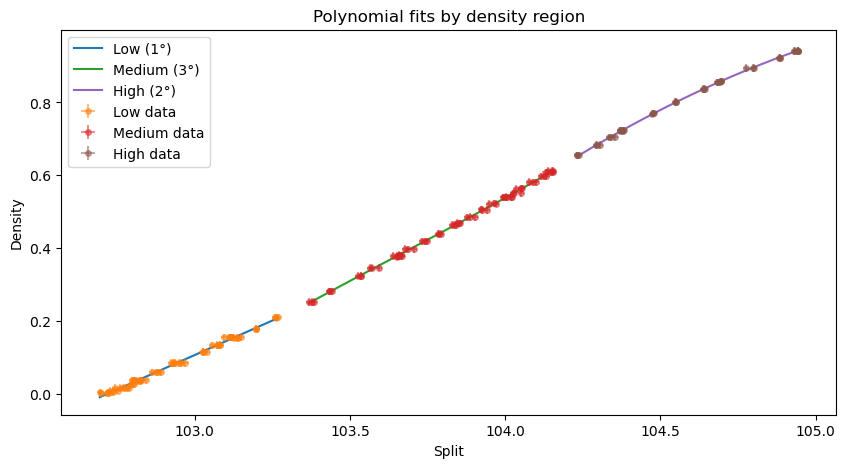

In [66]:
model = plot_and_save_CO2cali_pickle_all(
    cali_data=df,
    Split_col='Ne corrected ∆CO2  (cm-1)',
    CO2_dens_col='Density from EOS  (g/ml)',
    split_error='split_err',
    CO2_dens_error='dens_err',
    N_poly={'Low': 1, 'Medium': 3, 'High': 2},
    save_fig=True,
    eq_division='cmass_24C',
    save_suffix='_mixed'
)

In [67]:
test_split=pd.Series(np.linspace(102.5, 105.5))

test_density = model(test_split)
## 
Density_array_Cornell=pf.calculate_density_cornell(corrected_split=pd.Series(np.linspace(102.5, 105.5)), split_err=0, 
                                                    lab='CMASS', temp='SupCrit')

Cutoffs: lowcut = 0.24 mid = (0.24, 0.65) highcut = 0.65
Applying HIGH model to 50 values
yes


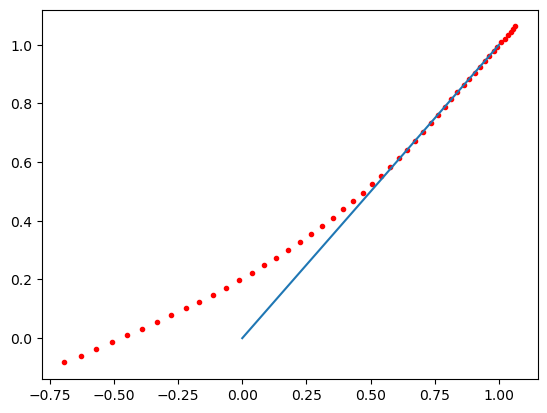

In [68]:
plt.plot(test_density, Density_array_Cornell['Density g/cm3'], '.r')
plt.plot([0, 1], [0, 1])

Cutoffs: lowcut = 0.24 mid = (0.24, 0.65) highcut = 0.65
Applying HIGH model to 200 values


Text(0, 0.5, 'Predicted CO₂ Density')

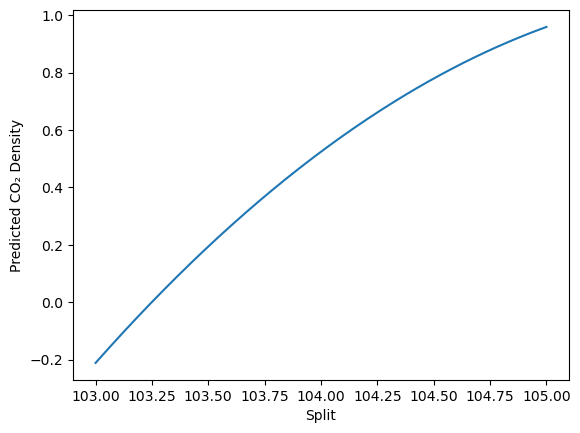

In [69]:
# Apply to test range
test_vals = np.linspace(103, 105, 200)
plt.plot(test_vals, model(test_vals))
plt.xlabel("Split")
plt.ylabel("Predicted CO₂ Density")